<a href="https://colab.research.google.com/github/NikitaHake/Dakhnenko-NV/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9A%D1%83%D1%80%D1%81%D0%BE%D0%B2%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D0%94%D0%B0%D1%85%D0%BD%D0%B5%D0%BD%D0%BA%D0%BE_%D0%9D_%D0%92_22_%D0%92%D0%A2_1_1%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CRIM         506 non-null    float64
 1   ZN           506 non-null    float64
 2   INDUS        506 non-null    float64
 3   CHAS         506 non-null    int64  
 4   NOX          506 non-null    float64
 5   RM           506 non-null    float64
 6   AGE          506 non-null    float64
 7   DIS          506 non-null    float64
 8   RAD          506 non-null    int64  
 9   TAX          506 non-null    int64  
 10  PTRATIO      506 non-null    float64
 11  B            506 non-null    float64
 12  LSTAT        506 non-null    float64
 13  MEDV         506 non-null    float64
 14  Unnamed: 14  0 non-null      float64
dtypes: float64(12), int64(3)
memory usage: 59.4 KB
CRIM             0
ZN               0
INDUS            0
CHAS             0
NOX              0
RM               0
AGE            

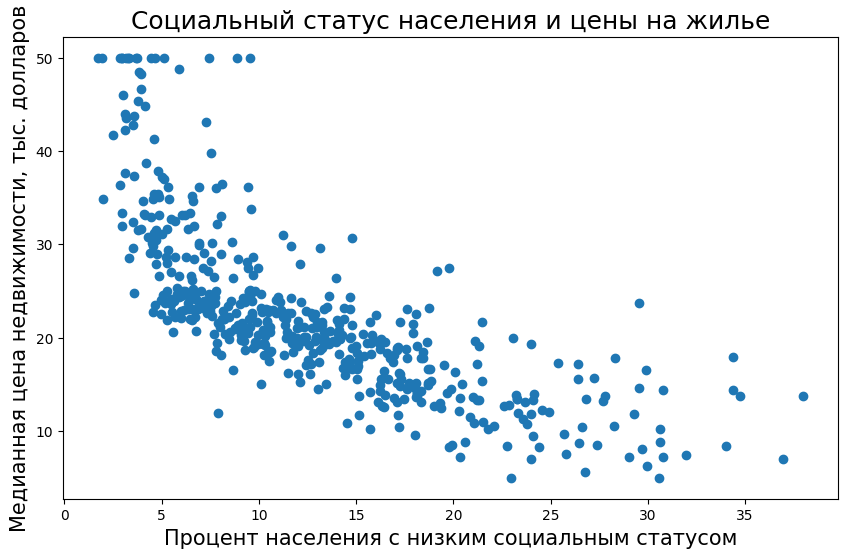

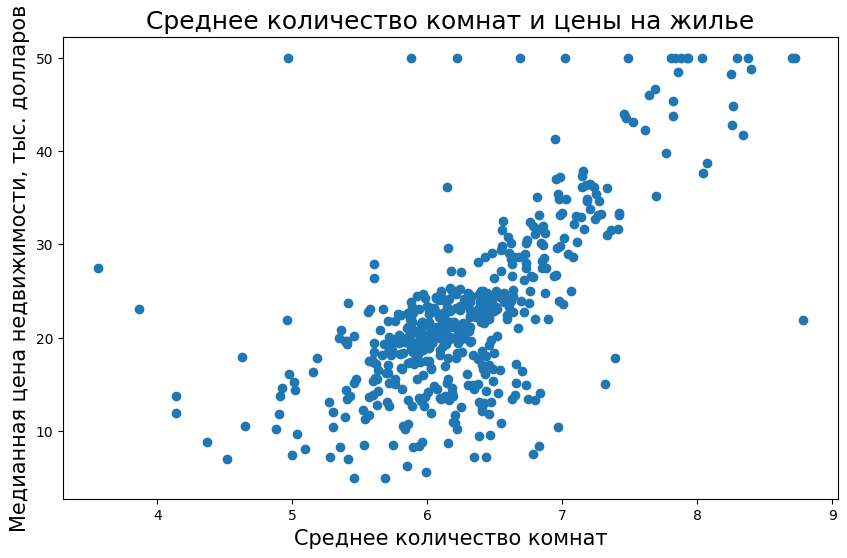

(354, 5) (354,)
(152, 5) (152,)
[26.62981059 31.10008241 16.95701338 25.59771173 18.09307064]
Root Mean Squared Error (RMSE): 5.107447670220913
R2: 0.65
[ 4.58472965e+00 -6.14838082e-01 -8.30469649e-01 -3.21801353e-03
  8.89192908e-02]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# сформированный датафрейм
boston_df = pd.read_csv('/boston.csv')
boston_df.head()
# посмотрим с каким типом переменных нам предстоит работать
boston_df.info()
print(boston_df.isnull().sum())
# посчитаем коэффициент корреляции для всего датафрейма и округлим значение
corr_matrix = boston_df.corr().round(2)
print(corr_matrix)
# подготовим данные (поместим столбцы датафрейма в переменные)
x1 = boston_df['LSTAT']
x2 = boston_df['RM']
y = boston_df['MEDV']
# зададим размер и построим первый график
plt.figure(figsize = (10,6))
plt.scatter(x1, y)
# добавим подписи
plt.xlabel('Процент населения с низким социальным статусом', fontsize = 15)
plt.ylabel('Медианная цена недвижимости, тыс. долларов', fontsize = 15)
plt.title('Социальный статус населения и цены на жилье', fontsize = 18)
plt.show()
# отступ между графиками
print("")
print("")
# зададим размер и построим второй график
plt.figure(figsize = (10,6))
plt.scatter(x2, y)
# добавим подписи
plt.xlabel('Среднее количество комнат', fontsize = 15)
plt.ylabel('Медианная цена недвижимости, тыс. долларов', fontsize = 15)
plt.title('Среднее количество комнат и цены на жилье', fontsize = 18)
plt.show()
# поместим наши признаки в переменную X, а цены на жилье в переменную y
X = boston_df[['RM', 'LSTAT', 'PTRATIO', 'TAX', 'INDUS']]
y = boston_df['MEDV']
# импортируем необходимый модуль
from sklearn.model_selection import train_test_split
# размер тестовой выборки составит 30%
# также зададим точку отсчета для воспроизводимости
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
# размерность обучающей
print(X_train.shape, y_train.shape)
# и тестовой выборки
print(X_test.shape, y_test.shape)
# из набора линейных моделей библиотеки sklearn импортируем линейную регрессию
from sklearn.linear_model import LinearRegression
# создадим объект этого класса и запишем в переменную model
model = LinearRegression()
# обучим нашу модель
model.fit(X_train, y_train)
# на основе нескольких независимых переменных (Х) предскажем цену на жилье (y)
y_pred = model.predict(X_test)
# выведем первые пять значений с помощью диапазона индексов
print(y_pred[:5])
# импортируем модуль метрик
from sklearn import metrics
# выведем корень среднеквадратической ошибки
# сравним тестовые и прогнозные значения цен на жилье
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', np.round(metrics.r2_score(y_test, y_pred), 2))
print(model.coef_)